# Setup
__To run any of the examples__, you must run the following three cells:
- [Colab setup](#Google-Colab-setup)
- [Filepaths](#Filepaths)*
- [Imports](#Imports)

After running these cells, you should be able to run each of the sections (e.g., [Plotting in the Pacific](#Plotting-in-the-Pacific) or [Plotting individual contour lines](#Plotting-individual-contour-lines)) separately.

*Before running the "Filepaths" cell, make sure the paths are correct (i.e., they reflect location of the data for your PC).

## Google Colab setup
This cell checks if you're in Google Colab – if you are, it installs necessary packages and mounts your Google Drive folder. If you are running in Google Colab, you may have to run the cell below twice because the kernel crashes; I'm not sure why this happens.

In [1]:
## check if we're in Colab
try:
    import google.colab

    ## install package that allows us to use mamba in Colab
    !pip install -q condacolab
    import condacolab

    condacolab.install()

    ## install extra packages to colab environment
    !mamba install -c conda-forge python=3.10.13 cartopy cftime cartopy

    ## connect to Google Drive (will prompt you to ask for permissions)
    from google.colab import drive

    drive.mount("/content/drive")

    ## flag telling us the notebook is running in Colab
    IN_COLAB = True

except:
    IN_COLAB = False

## Filepaths
__To run this notebook, you'll need to update the filepaths below__, which specify the location of the data (otherwise, you'll get a ```FileNotFoundError``` message when you try to open the data). These filepaths will differ for Mac vs. Windows users and depend on how you've accessed the data (e.g., mounting the WHOI file server or downloading the data).

Below, we've defined two sets of filepaths: one for the cloud (to be used with Google Colab) and another for data on CMIP server/local machine.

In [2]:
if IN_COLAB:

    ## path to ERA5 reanalysis 2m-temperature data
    era5_t2m_path = "/content/drive/My Drive/climate-data/era5/2m_temperature"

    ## path to ERA5 reanalysis sea level pressure data
    era5_slp_path = "/content/drive/My Drive/climate-data/era5/mean_sea_level_pressure"

    ## path to MIROC6 SST data
    miroc6_path = "/content/drive/My Drive/climate-data"

else:

    ## path to ERA5 reanalysis 2m-temperature data
    era5_t2m_path = (
        "/Volumes/cmip6/data/era5/reanalysis/single-levels/monthly-means/2m_temperature"
    )

    ## path to ERA5 reanalysis sea level pressure data
    era5_slp_path = "/Volumes/cmip6/data/era5/reanalysis/single-levels/monthly-means/mean_sea_level_pressure"

    ## path to MIROC6 sea surface temperature data
    miroc6_path = (
        "/Volumes/cmip6/data/cmip6/CMIP/MIROC/MIROC6/historical/r1i1p1f1/Omon/tos/gn/1"
    )

## Imports

In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import seaborn as sns
import os
import glob

## set plotting style
sns.set(rc={"axes.facecolor": "white", "axes.grid": False})

# Plotting in the Pacific

#### Plotting functions
First, define a function to set up a plot with the given projection and lon/lat range (```plot_setup```). Then define a wrapper function which sets up a plot with the given projection *in the North Pacific*.
Note we have to specify the projection keyword (e.g., ccrs.PlateCarree or ccrs.Orthographic) when creating an Axes object with the ```fig.add_subplot``` function. When plotting data on regular lon/lat grids, we also have to pass ```ccrs.PlateCarree``` as an argument to ```ax.set_extent``` and to the contour plotting function, ```ax.contourf```. Note the map projection type passted to ```fig.add_subplot``` may change (shown below) but we always pass ```ccrs.PlateCarree``` to the ```ax.set_extent``` and ```ax.contourf``` functions (I don't know why this is the case, but it seems to work :).

In [4]:
def plot_setup(fig, projection, lon_range, lat_range):
    """Add a subplot to the figure with the given map projection
    and lon/lat range. Returns an Axes object."""

    ## Create subplot with given projection
    ax = fig.add_subplot(projection=projection)

    ## Subset to given region
    extent = [*lon_range, *lat_range]
    ax.set_extent(extent, crs=ccrs.PlateCarree())

    ## draw coastlines
    ax.coastlines()

    return ax


def plot_setup_pacific(fig, projection):
    """Plot Pacific region"""
    return plot_setup(fig, projection, lon_range=[120, 240], lat_range=[30, 70])

#### Load data
Open the ERA5 2m-temperature data

In [5]:
## get list of files
file_pattern = os.path.join(era5_t2m_path, "*.nc")
file_list = sorted(glob.glob(file_pattern))

## load the first one
t2m = xr.open_dataset(file_list[0])

## Get the first time step, and load into memory with ".compute()"
t2m = t2m["t2m"].isel(time=0).compute()

#### Make plots for two projection types, PlateCarree and Orthographic

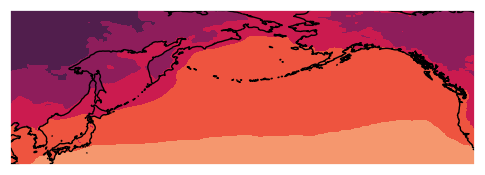

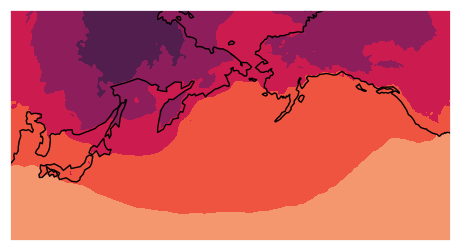

In [6]:
## define some map projections
## for a full list, see https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html
proj_PC = ccrs.PlateCarree(central_longitude=180)
proj_ortho = ccrs.Orthographic(central_longitude=180, central_latitude=50)

## Plot data with each projection
for proj in [proj_PC, proj_ortho]:

    ## make blank figure
    fig = plt.figure(figsize=(6, 3))

    ## plot pacific background
    ax = plot_setup_pacific(fig, proj)

    ## plot data
    ax.contourf(t2m.longitude, t2m.latitude, t2m, transform=ccrs.PlateCarree())

    plt.show()

# Plotting individual contour lines
This section shows how to superimpose/highlight individual contour lines on a filled contour plot.

#### Load example data
Open the ERA5 2m-temperature data

In [5]:
## get list of files
file_pattern = os.path.join(era5_t2m_path, "*.nc")
file_list = sorted(glob.glob(file_pattern))

## load the first one
t2m = xr.open_dataset(file_list[0])

## Get the first time step, and load into memory with ".compute()"
t2m = t2m["t2m"].isel(time=0).compute()

#### Plotting functions
__Note__: see [Plotting in the Pacific](#Plotting-in-the-Pacific) for a detailed explanation of these functions.

In [8]:
def plot_setup(fig, projection, lon_range, lat_range):
    """Add a subplot to the figure with the given map projection
    and lon/lat range. Returns an Axes object."""

    ## Create subplot with given projection
    ax = fig.add_subplot(projection=projection)

    ## Subset to given region
    extent = [*lon_range, *lat_range]
    ax.set_extent(extent, crs=ccrs.PlateCarree())

    ## draw coastlines
    ax.coastlines()

    return ax


def plot_setup_pacific(fig, projection):
    """Plot Pacific region"""
    return plot_setup(fig, projection, lon_range=[120, 240], lat_range=[30, 70])

#### Plot the data (and highlight the $285 K$ contour)

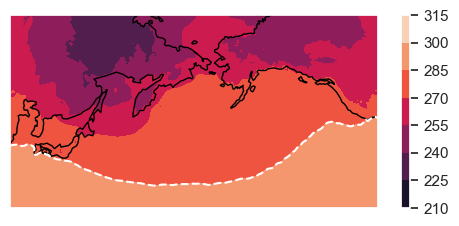

In [15]:
## make blank figure
fig = plt.figure(figsize=(6, 2.5))

## plot pacific background
ax = plot_setup_pacific(
    fig, projection=ccrs.Orthographic(central_longitude=180, central_latitude=50)
)

## plot the data
plot_data = ax.contourf(t2m.longitude, t2m.latitude, t2m, transform=ccrs.PlateCarree())

## Add a colorbar
cb = fig.colorbar(plot_data)

##### Highlight a specified contour value #####

## specify which value to highlight
contour_value = 285

## Create list of contour levels to pass to the plotting function.
## We'll pad the contour value we want to plot with -/+ a big number:
## we have to add these "pad" values because the plotting function
## (ax.contour) will throw an error if we only pass only one value.
## The pad value is chosen to be outside of the range of the data values
## so isn't plotted.
pad_value = 1e10
levels = [-pad_value, contour_value, pad_value]

## call the plotting function
ax.contour(
    t2m.longitude,
    t2m.latitude,
    t2m,
    transform=ccrs.PlateCarree(),
    levels=levels,
    colors="white",
    linestyles="dashed",
)

################################################

plt.show()